In [15]:
#importing libraries
import matplotlib.pyplot as plt
from sklearn.datasets import  fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
# Importing base algorithm
from sklearn.neural_network import  MLPClassifier
# Importing Decision Tree  
from sklearn.tree import DecisionTreeClassifier

In [16]:
# Loading dataframe
lfw_dataset = fetch_lfw_people(min_faces_per_person = 100)

In [17]:
## EDA 
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
Y = lfw_dataset.target
target_names =lfw_dataset.target_names

In [18]:
# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

/home/raxit/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [19]:
## Dimentionality Reduction using PCA
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

In [20]:
# Number of files, Number of initial Features = 2914
X.shape

(1140, 2914)

In [21]:
# Transforming the domain of the dataset to reduced dimentions
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [22]:
## Training the model
# Initializing the classifier - neural-net with 1024 hidden layers
clf = MLPClassifier(hidden_layer_sizes=(1024,), verbose=True, early_stopping=True).fit(X_train_pca, Y_train)  
# Using decision tree as predictive model
#clf = DecisionTreeClassifier().fit(X_train, Y_train) 

Iteration 1, loss = 1.46580033
Validation score: 0.565217
Iteration 2, loss = 1.00068778
Validation score: 0.608696
Iteration 3, loss = 0.74294536
Validation score: 0.760870
Iteration 4, loss = 0.54885187
Validation score: 0.826087
Iteration 5, loss = 0.43059868
Validation score: 0.836957
Iteration 6, loss = 0.34248241
Validation score: 0.826087
Iteration 7, loss = 0.27431082
Validation score: 0.847826
Iteration 8, loss = 0.22757377
Validation score: 0.847826
Iteration 9, loss = 0.19095498
Validation score: 0.858696
Iteration 10, loss = 0.16027557
Validation score: 0.836957
Iteration 11, loss = 0.13631760
Validation score: 0.836957
Iteration 12, loss = 0.11594719
Validation score: 0.836957
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


In [23]:
# Predicting
Y_pred = clf.predict(X_test_pca)

In [24]:
# Taking Classification Report
print(classification_report(Y_pred, Y_test, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.81      0.80      0.80        54
  Donald Rumsfeld       0.62      0.93      0.74        14
    George W Bush       0.96      0.83      0.89       123
Gerhard Schroeder       0.80      0.94      0.86        17
       Tony Blair       0.61      0.85      0.71        20

      avg / total       0.86      0.84      0.84       228



In [25]:
## Accuracy REPORT
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Accuracy Score
print(accuracy_score(Y_test, Y_pred))
# Classification Report
print(classification_report(Y_test, Y_pred, target_names= target_names))
# Confusion Matrix
print(confusion_matrix(Y_test, Y_pred))

0.8377192982456141
                   precision    recall  f1-score   support

     Colin Powell       0.80      0.81      0.80        53
  Donald Rumsfeld       0.93      0.62      0.74        21
    George W Bush       0.83      0.96      0.89       106
Gerhard Schroeder       0.94      0.80      0.86        20
       Tony Blair       0.85      0.61      0.71        28

      avg / total       0.84      0.84      0.83       228

[[ 43   0   8   0   2]
 [  3  13   5   0   0]
 [  3   1 102   0   0]
 [  2   0   1  16   1]
 [  3   0   7   1  17]]


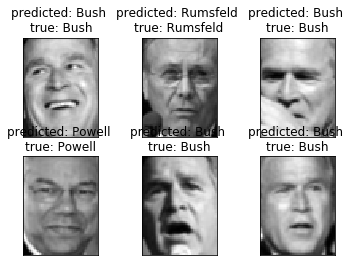

In [30]:
## Visualization
# Creating images
def plot_gallery(images, titles, h, w, rows=2, cols=3):
    plt.figure()
    for i in range(rows*cols):
        plt.subplot(rows,cols,i+1)
        plt.imshow(images[i].reshape((h,w)), cmap= plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
        
# Defining method for titles    
def titles(Y_pred, Y_test, target_names):
    for i in range(Y_pred.shape[0]):
        pred_name= target_names[Y_pred[i]].split(' ')[-1]
        true_name = target_names[Y_test[i]].split(' ')[-1]
        yield 'predicted: {0} \ntrue: {1}'.format(pred_name,true_name)
    
prediction_titles= list(titles(Y_pred, Y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)

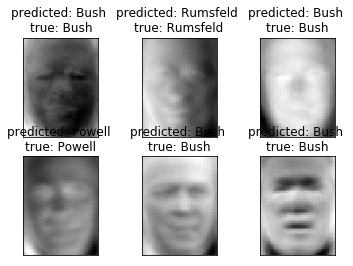

In [31]:
# plot the gallery of the most significative eigenfaces
eigenfaces = pca.components_.reshape((100, h, w))

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, prediction_titles, h, w)
plt.show()

In [32]:
# Variance range of PC1 to PCn
print(pca.explained_variance_ratio_)

[0.18358877 0.14982243 0.07011908 0.05900205 0.05241971 0.03135943
 0.02595084 0.02166978 0.02025503 0.01936306 0.01549404 0.01482566
 0.01280819 0.01124757 0.01009441 0.00952332 0.00914578 0.00898901
 0.00823795 0.00733193 0.00672829 0.00655038 0.0060395  0.0057016
 0.00556889 0.00513178 0.00499674 0.0046254  0.0045433  0.00412065
 0.00394714 0.00388065 0.00367657 0.0036452  0.00340453 0.00335432
 0.00328184 0.00314479 0.00301762 0.00299286 0.00292271 0.00273387
 0.00267992 0.00255728 0.00251289 0.00245804 0.00238079 0.00231729
 0.00223909 0.00221921 0.00210371 0.00208153 0.00199302 0.00196393
 0.00194228 0.00186813 0.00184606 0.00179962 0.00176846 0.00173294
 0.00169938 0.00162942 0.00161821 0.00156451 0.00155588 0.00152132
 0.00151598 0.00147148 0.00144405 0.00140388 0.00139532 0.00137446
 0.00132171 0.00130302 0.00127192 0.00125583 0.00122696 0.00120293
 0.0011843  0.00116353 0.00114649 0.00112279 0.0011084  0.00108836
 0.00107322 0.00105148 0.00102777 0.00101398 0.00098683 0.00096